In [12]:
import pandas as pd
import psycopg2 as pg
import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# set up configuration
host = "localhost"
port = "5432"
database = "postgres"
user = "postgres"
password = "Jakarta12"
setting = "dbname=" + database + " user=" + user + " host=" + host + " port=" + port + " password=" + password
engine = pg.connect(setting)

In [80]:


query = f"""
	select * from car_data cdvc
    """

df_read = pd.read_sql(query, con=engine)

In [73]:
df_read


,car_name,Year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [74]:
#cek jumlah kolom dan baris dari data.
df_read.shape

(301, 9)

In [75]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   kms_driven     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   seller_type    301 non-null    object 
 7   transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
data = df_read.dropna(axis=0)
data.describe()

,Year,selling_price,present_price,kms_driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [82]:


#Univariate analysis bedrooms.
#f = plt.figure(figsize=(12,4))
#f.add_subplot(1,2,1)
#sns.countplot(df_read['year'])
df_read.groupby(['Year']).count()

 

,car_name,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,Owner
Year,,,,,,,,
2003,2,2,2,2,2,2,2,2
2004,1,1,1,1,1,1,1,1
2005,4,4,4,4,4,4,4,4
2006,4,4,4,4,4,4,4,4
2007,2,2,2,2,2,2,2,2
2008,7,7,7,7,7,7,7,7
2009,6,6,6,6,6,6,6,6
2010,15,15,15,15,15,15,15,15
2011,19,19,19,19,19,19,19,19


In [83]:
df_read.corr().style.background_gradient().set_precision(2)

,Year,selling_price,present_price,kms_driven,Owner
Year,1.00,0.24,-0.05,-0.52,-0.18
selling_price,0.24,1.00,0.88,0.03,-0.09
present_price,-0.05,0.88,1.00,0.20,0.01
kms_driven,-0.52,0.03,0.20,1.00,0.09
Owner,-0.18,-0.09,0.01,0.09,1.00


In [85]:
features = ['Year', 'kms_driven']
x = data[features]
y = data['selling_price']
x.shape, y.shape

((301, 2), (301,))

In [87]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [89]:
test_y.shape


(76,)

In [90]:
#Membangun machine learning model dengan algoritma K-Nearest Neighbors

from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  18.395945218750004 
 Accuracy:  0.012542502665268795


In [92]:
#Menggunakan Elbow method untuk menentukan nilak K terbaik
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

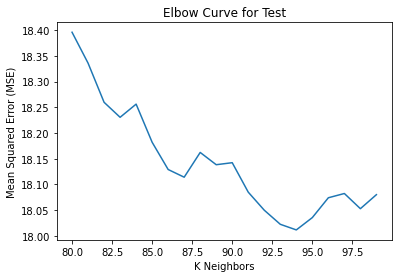

In [94]:
#Menampilkan grafik nilai k berdasarkan MSE

K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [96]:
#Melakukan koreksi nilai K dengan menggunakan nilai K terbaik berdasarkan hasil dari Elbow method

new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)


 Accuracy of new model (%): 2.937372623050849 
 Accuracy of old model (%): 1.2542502665268795 
 Improvement (%): 1.6831223565239695


In [100]:
#Percobaan 1 =>Contoh penggunaan machine learning yang dibuat untuk memprediksi harga mobil bekas


data_mobil_bekas = np.array([[2019,5000]]) #tahun, kms
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: ', prediction_old, 
      'Hasil Prediksi harga mobil dengan new model: ', prediction_new)

 Hasil Prediksi harga mobil dengan old model:  [4.494] Hasil Prediksi harga mobil dengan new model:  [4.12948454]


C:\Users\jilli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jilli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [101]:
#Percobaan 2 =>Contoh penggunaan machine learning yang dibuat untuk memprediksi harga mobil bekas

data_mobil_bekas = np.array([[2008,20000]]) #tahun, kms
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: ', prediction_old, 
      'Hasil Prediksi harga mobil dengan new model: ', prediction_new)

 Hasil Prediksi harga mobil dengan old model:  [4.480375] Hasil Prediksi harga mobil dengan new model:  [4.65402062]


C:\Users\jilli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\jilli\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
